#### 【 이미지 변형 - 자르기 & ROI 】

- ROI : 관심영역 설정
    * 이미지 전체가 아닌 일부 관심되는 부분만 지정하는 것
    * 방법
        + numpy slicing : img[y:y+h, x+x+w]
        + cv2 함수 : cv2.selectROI()/cv2.selectROIs()

- ★★★ 주의 : opencv의 채널 순서가 BGR로 일반 이미지 순서와 다름

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
## 모듈 로딩
import numpy as np
import cv2
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
## 데이터 파일
DATA_FILE = '../Data/Image/flower.jpg'

In [3]:
## 데이터 로딩 및 기본 정보 출력
img     = cv2.imread(DATA_FILE)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f'로딩 Image 정보 : {img_rgb.shape}') if img_rgb is not None else print("이미지 없음")

로딩 Image 정보 : (321, 380, 3)


[2] 이미지 자르기 - **ROI [기본]** <hr> 

In [4]:
## ===========================================
## [2-1] 영역 설정
## ===========================================
## 좌표 설정
x, y, w, h = 50, 50, 150, 150

## ROI 영역 설정
img_roi = img_rgb[y:y+h, x:x+w].copy()

In [5]:
## ===========================================
## [2-2] 이미지에 표시
## ===========================================
cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 0, 255), 10)

array([[[234, 233, 239],
        [234, 233, 239],
        [234, 233, 239],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [235, 235, 235]],

       [[232, 232, 234],
        [231, 232, 234],
        [232, 232, 234],
        ...,
        [230, 232, 231],
        [231, 231, 231],
        [230, 232, 231]],

       [[226, 229, 222],
        [224, 229, 222],
        [226, 229, 222],
        ...,
        [227, 232, 228],
        [229, 231, 228],
        [227, 232, 228]],

       ...,

       [[ 97, 112,  73],
        [ 97, 112,  71],
        [ 98, 113,  74],
        ...,
        [143, 165, 103],
        [143, 164, 105],
        [142, 163, 104]],

       [[205, 215, 188],
        [205, 215, 188],
        [205, 215, 188],
        ...,
        [202, 219, 175],
        [203, 218, 177],
        [201, 218, 176]],

       [[211, 214, 205],
        [211, 214, 205],
        [211, 214, 205],
        ...,
        [209, 215, 201],
        [211, 215, 201],
        [209, 215, 201]]

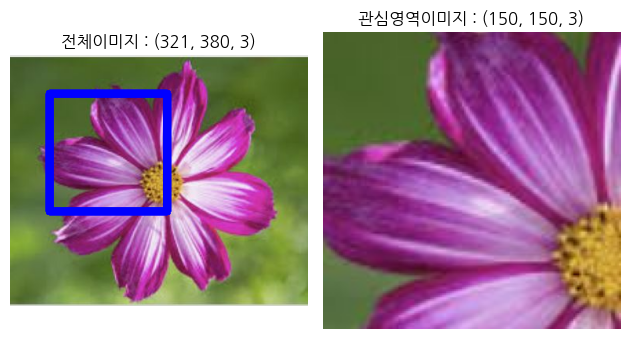

In [ ]:
## ===========================================
## [2-3] 이미지 시각화
## ===========================================
fig, axes = plt.subplots(1, 2)

titles    = ['전체이미지', '관심영역이미지']
images    = [img_rgb, img_roi]

for ax, title, img_data in zip(axes, titles, images):
    ax.imshow(img_data)
    ax.set_title(f'{title} : {img_data.shape}')
    ax.set_axis_off()
plt.tight_layout()
plt.show()

[3] 이미지 자르기 - 가운데 자르기 <hr>

In [10]:
## ===========================================
## [3-1] 현재 이미지 원본 크기정보
## ===========================================
## 데이터 로딩 및 기본 정보 출력
img     = cv2.imread(DATA_FILE)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W    = img_rgb.shape[:2]                 ## 원본 크기 확인

## ===========================================
## [3-2] 가운데 이미지 자르기
## ===========================================
crop_size = 80                              ## 원하는 크기 (정사각형)
center_x, center_y = W // 2, H // 2         ## 가운데 위치 계산
x1 = center_x - crop_size // 2              ## ROI 영역 지정
y1 = center_y - crop_size // 2
x2 = center_x + crop_size // 2
y2 = center_y + crop_size // 2

print(f'center=  ({center_x},{center_y}),  p1= ({x1},{y1}), p2=({x2},{y2})')

cropped = img_rgb[y1:y2, x1:x2].copy()      ## 가운데 중심에서 자르기

center=  (190,160),  p1= (150,120), p2=(230,200)


In [ ]:
## ===========================================
## [3-3] 크롭 후 리사이징
## -> 픽셀은 많아졌지만 "새 정보가 생긴 건 아님" (부드럽게 늘어난 느낌)
## imshow() : 이미지를 축 크기에 맞게/ 칸 크기에서 맞게
##            자동으로 확대/축소해서 출력 
## ===========================================
resized = cv2.resize(cropped, (128, 128), interpolation=cv2.INTER_LINEAR)

## 이미지 시각화
_, axes = plt.subplots(1, 3)
img_data = [img_rgb, cropped, resized]
titles   = ["ALL", "ROI", "RESIZE-ROI"]
for ax, data, title in zip(axes, img_data, titles):
    ax.imshow(data)
    ax.set_title(f'{title}:{data.shape}')
    ax.set_axis_off()
plt.tight_layout()
plt.show()